# MCMC inference using `emcee`

In [6]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([1,1.5,2,2.5])
y = np.array([1.87640523, 2.59001572, 3.4978738 , 4.47408932])
yerr = 0.1

In [3]:
def model(theta, x):
    a, b = theta
    return a + b * x

def log_likelihood(theta, x, y, yerr):
    m = model(theta, x)
    return -0.5 * np.sum((y - m) ** 2 / yerr**2)

def log_prior(theta):
    a, b = theta
    if -0.5 < a < 0.5 and 0.0 < b < 10.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [4]:
# start at the MLE
X = np.vander(x, N=2, increasing=True)
x_mle = np.linalg.inv(X.T @ X) @ X.T @ y

# create a small ball around the MLE the initialize each walker 
nwalkers, ndim = 30, 2
pos = x_mle + 1e-4 * np.random.randn(nwalkers, ndim)

# run emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);

You must install the tqdm library to use progress indicators with emcee


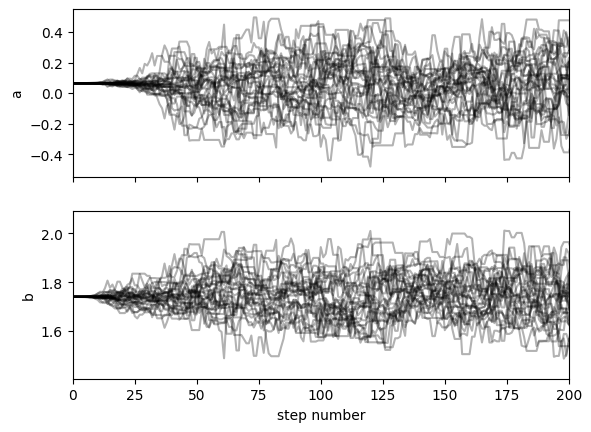

In [7]:
fig, axes = plt.subplots(ndim, sharex=True)
samples = sampler.get_chain()
labels = ["a", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3, rasterized=True)
    ax.set_xlim(0, 200)
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

In [8]:
tau = sampler.get_autocorr_time()
print(tau)

[30.27264582 30.78725068]


In [9]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(9780, 2)


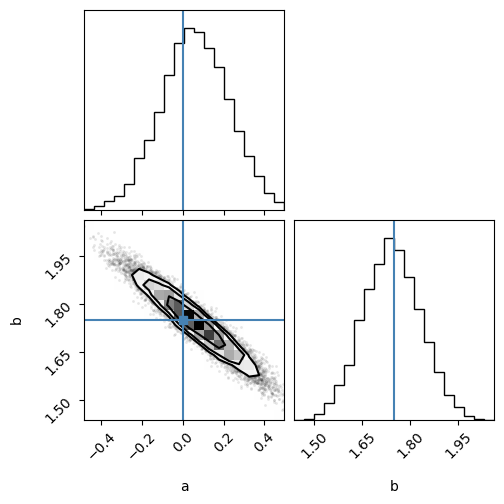

In [10]:
a_true, b_true = 0, 1.75
fig = corner.corner(
    flat_samples, labels=labels, truths=[a_true, b_true]
);